In [1]:
import sys
import os

# Basic
import numpy as np
import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import matplotlib.pyplot as plt

# Dataset
from keras.datasets import mnist

# Evaluation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Your SOM model
from som import SOM


2025-04-28 19:43:23.716961: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 19:43:24.145154: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 19:43:24.513627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745883804.739521   30632 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745883804.924685   30632 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745883805.650811   30632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images from (28,28) to (784,)
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


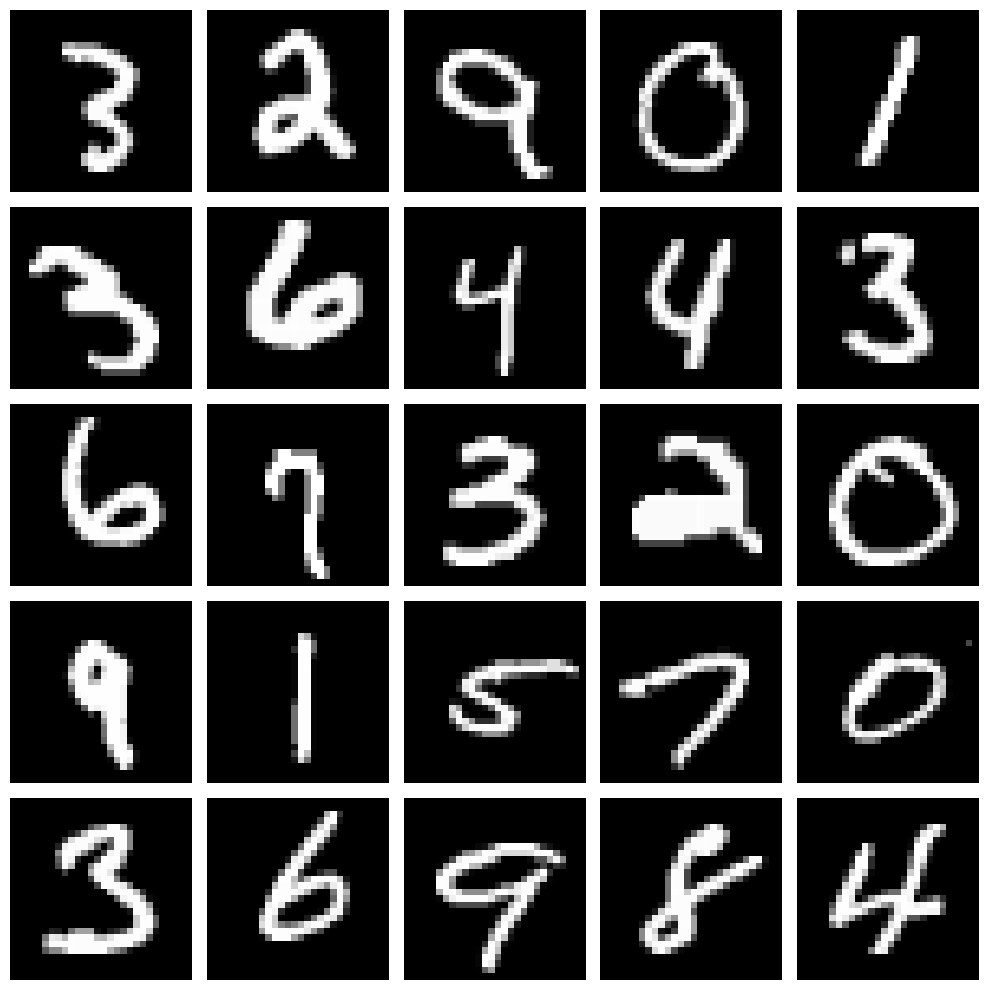

In [10]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 25  # you can change this
grid_size = int(num_samples ** 0.5)

# randomly select 25 samples from X_train
indices = np.random.choice(len(X_train), size=num_samples, replace=False)
selected_samples = X_train[indices]

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, selected_samples.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Initialize SOM
som = SOM(
    lattice_rows=5,
    lattice_columns=5,
    initial_learning_rate=1,
    neighbourhood_radius=3,
    max_iters=100,
    learning_rate_type="exponential",
    random_state=42,
    verbose=True,
    lattice_type="hexagonal",
    use_tqdm=True
)

# Fit SOM
som.fit(X_train)


 10%|██████████████████████████████                                                                                                                                                                                                                                                                              | 100/1000 [08:21<59:57,  4.00s/it]

Iter: 100: inertia: 3523326.06 | Learning Rate: 0.905 | Neighbourhood factor: 2.715


 20%|████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                | 200/1000 [14:46<53:53,  4.04s/it]

Iter: 200: inertia: 3872394.33 | Learning Rate: 0.819 | Neighbourhood factor: 2.456


 30%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 300/1000 [21:18<44:39,  3.83s/it]

Iter: 300: inertia: 3457378.11 | Learning Rate: 0.741 | Neighbourhood factor: 2.222


 40%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                    | 400/1000 [27:37<38:20,  3.83s/it]

Iter: 400: inertia: 3412665.56 | Learning Rate: 0.670 | Neighbourhood factor: 2.011


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                      | 500/1000 [34:04<35:45,  4.29s/it]

Iter: 500: inertia: 3083562.38 | Learning Rate: 0.607 | Neighbourhood factor: 1.820


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                        | 600/1000 [42:53<30:31,  4.58s/it]

Iter: 600: inertia: 3000649.28 | Learning Rate: 0.549 | Neighbourhood factor: 1.646


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 700/1000 [49:35<22:23,  4.48s/it]

Iter: 700: inertia: 2988301.11 | Learning Rate: 0.497 | Neighbourhood factor: 1.490


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 800/1000 [59:39<21:14,  6.37s/it]

Iter: 800: inertia: 2953057.59 | Learning Rate: 0.449 | Neighbourhood factor: 1.348


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 900/1000 [1:09:04<08:19,  5.00s/it]

Iter: 900: inertia: 2904294.71 | Learning Rate: 0.407 | Neighbourhood factor: 1.220


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:16:30<00:00,  4.59s/it]

Iter: 1000: inertia: 2764529.03 | Learning Rate: 0.368 | Neighbourhood factor: 1.104
Number of Unique Clusters: 60000


SOM(lattice_columns=5, lattice_rows=5, max_iters=1000, neighbourhood_radius=3,
    random_state=42, use_tqdm=True, verbose=True)

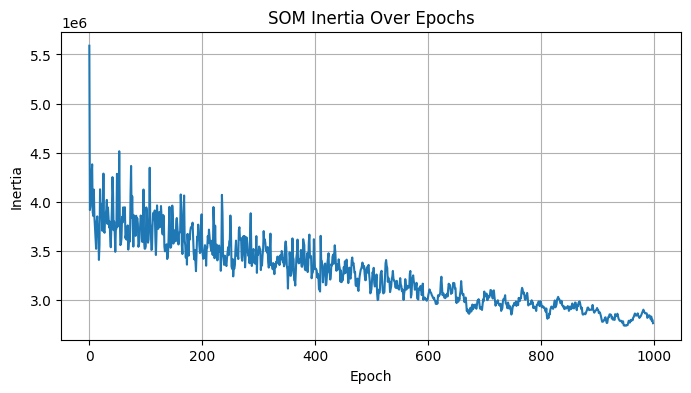

In [4]:
som.plot_inertia()

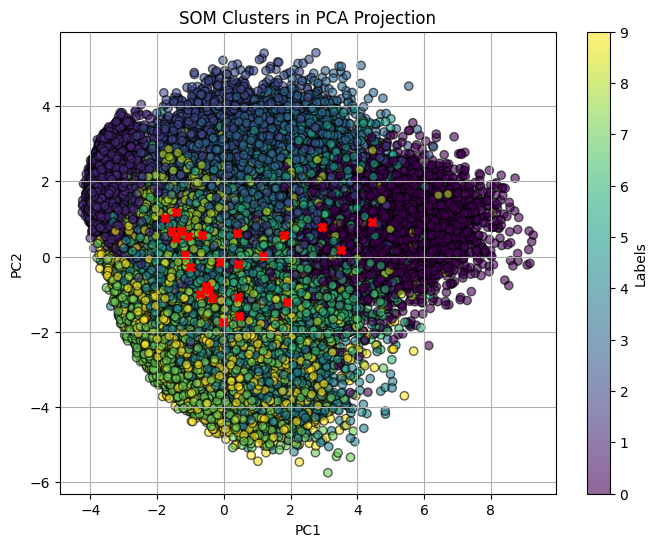

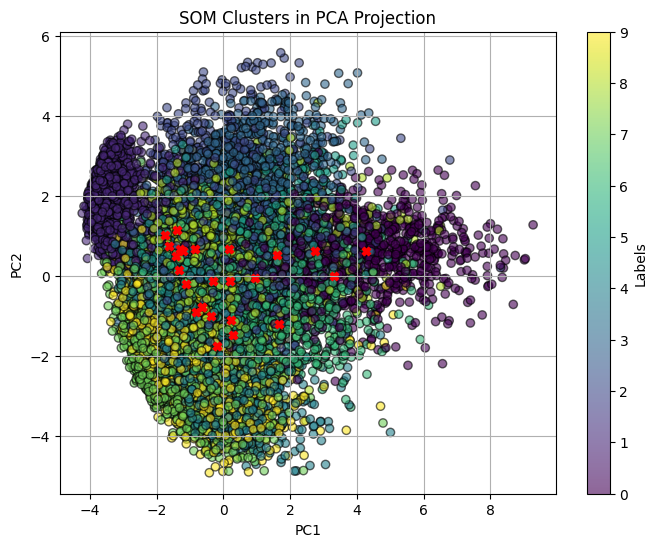

In [5]:
som.plot_clusters(X_train, y_train)
som.plot_clusters(X_test, y_test)

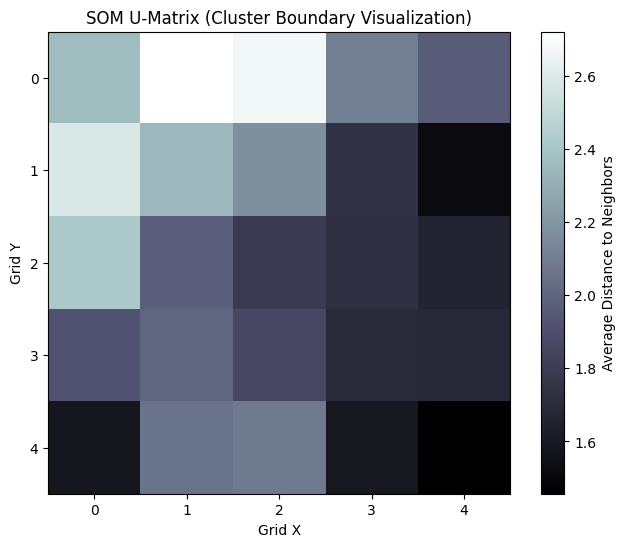

In [7]:
som.plot_umatrix()

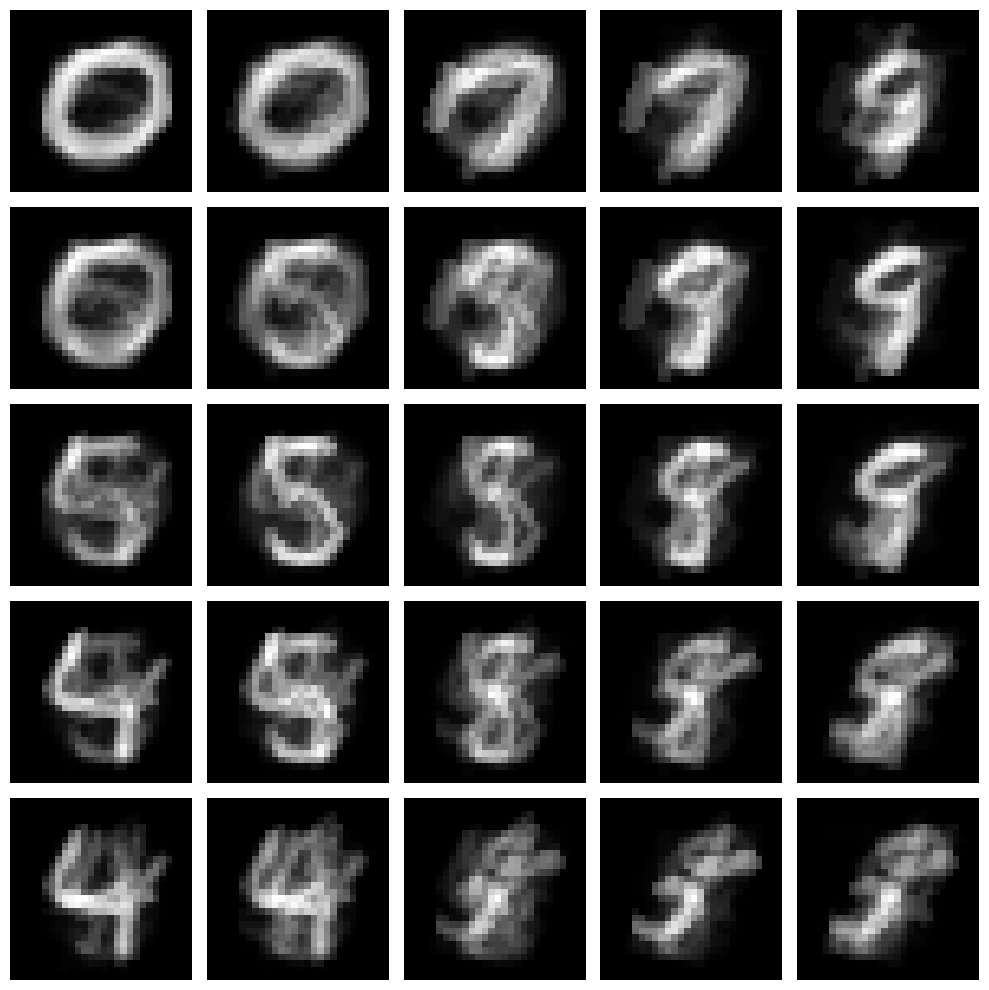

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, som.weights_.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
som.inertia_

np.float64(2738599.312746678)